# Playing with datasets

In [4]:
import torch
import torchvision
from torchvision import transforms, datasets

In [5]:
train = datasets.MNIST("", train=True, download=True, transform=transforms.Compose([transforms.ToTensor()])) # download training data and transform it into a torch tensor


test = datasets.MNIST("", train=False, download=True, transform=transforms.Compose([transforms.ToTensor()])) # same but for testing data



Failed to download (trying next):
<urlopen error [Errno 61] Connection refused>



100%|████████████████████████████████████████████████████████████████████████████████████████| 9.91M/9.91M [00:01<00:00, 5.80MB/s]


Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 61] Connection refused>



100%|█████████████████████████████████████████████████████████████████████████████████████████| 28.9k/28.9k [00:00<00:00, 175kB/s]


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 61] Connection refused>



100%|████████████████████████████████████████████████████████████████████████████████████████| 1.65M/1.65M [00:01<00:00, 1.56MB/s]


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 61] Connection refused>



100%|████████████████████████████████████████████████████████████████████████████████████████| 4.54k/4.54k [00:00<00:00, 1.34MB/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



In [8]:

trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
# Batch_size = is the size of each batch being passed to the model at a time, a batch is a set of samples of length batch_size, each sample is made of an input feature vector and a corresponding label (target value).
# shuffle = shuffle the data to improve generalization


testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)


# Batches

- Passing our data via batches allows for better generalization and fitting of our overall data.
  
- If we pass the entire dataset, as the model tries to optmize all the weights, biases and connections the model will be able to make some generalization but it won't be very effective when dealing with new novel inputs that it hasn't observed in the training set.
  
- Batches make it possible to train a model on terabytes of data one batch at a time and they also drastically lower the probability of overfitting.

- most common batch size is between **8** and **64** regardless of the size of the memory and or data one has access to.

- The bigger the batch size the faster the training and vice versa (training time & generalization tradeoff)



# The datasets and Objectives



## Datasets

- The MNIST datasets are hand-drawn images of numbers from 0 to 9


# Objectives
 
- The name of the game is generalization

- If you take a neural network and feed it a bunch of zeros the nn will learn to optimize for zeros and will classify everything as a zero

- If you train it on ones instead of zeros it will classify everything as a one and until you get to the nines it will optimize for nines and classify everything as a 9

- If you shuffle your datasets you give the nn the opportunity to learn general principles rather then just simply figuring out little tricks to minimize loss.

- The neural network will take the quickest route to minimizing loss even at the expense of generalization so shuffling the data is cruicial.




In [9]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

- data is a tensor object containing
  1) a tensor of tensors holding the images
  2) a tensor of tensors holding the labels (the actual numbers)


In [11]:
x, y = data[0][0], data[1][0] 

# x is the zeroth image 
# y is the zeroth label

print(y)

tensor(1)


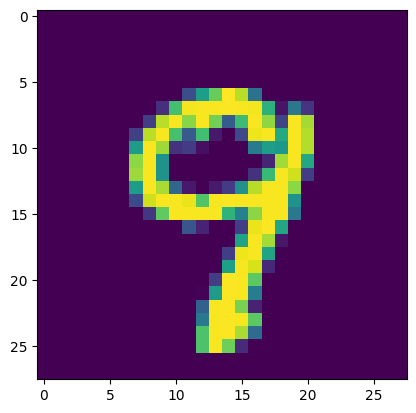

In [17]:
import matplotlib.pyplot as plt

plt.imshow(data[0][1].view(28, 28)) # imshow will display the image
# .view method returns a new tensor with the same data as trhe self tensor but of a different shape, specified in the args.
# the reason we reshape it because the original tensor has a shape of (1, 28, 28) which can't be passed to imgshow


#plt.show(x)


In [19]:
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in trainset:
    Xs, ys = data
    for y in ys:
        total+=1

print(counter_dict)
    

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [22]:
for i in counter_dict:
    print(f"{i}: {counter_dict[i]/total*100}") # displaying the percentage of each number in our dataset
    

0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001


# Batch diversity and Model Generalization

- Iterating over and printing the percentage of each sample in our batch allows us to observe the batche's diversity and equity.

- all samples in a batch must be balanced and somewhat diverse.

- example:

    - lets say the number 3 sample contributes to around 60% of our batch's samples, the NN will learn that the quickest way to decrease loss is to predict a 3 because it contributes to 60% of the sampele's in our batch.
      
    - The model will get stuck because the only way to get better (e.g. more accurate) is to have a higher loss which is not feasible and the only way to decrease loss is to predict 3 all the time which is not the desired outcome.
      
    - Shuffling and having each sample contribute to roughly equal proportions of the batch resolves this issue and allows the model to learn and to generalize.


<br/>

>**Takeaway:** Iterating over and printing the percentage of each sample in a single or a few batches is important to gain insights into the data before training.



